# Bike Sharing Case Study

### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially the company wants :
- To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19, by creating a linear model.
- To identify the variables affecting their revenues i.e. Which variables are significant in predicting the demand for shared bikes.
- To know the accuracy of the model, i.e. How well those variables describe the bike demands

They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

For attribute info [click here](https://raw.githubusercontent.com/shinde-chandrakant/BoomBikes-bike-sharing-assignment/master/Feature%2BAttributes.txt).

## Step1 :Reading and Understanding the data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Observing Dataset

In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### <font color = 'Blue'>Inferences:</font>
In the bike sharing dataset 730 rows and 16 columns in which 'cnt' is target column or a dependent variable.'cnt' variable indicates the total number of bike rentals, including both casual and registered.

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Quality Check

In [7]:
## percentage of missing value in each row
df.isnull().mean()*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### <font color = 'Blue'>Inferences:</font> 
No null or missingvalue found 

## Checking for duplicate Rows

In [8]:
df_1 =df.copy()
df_1.drop_duplicates(subset=None ,inplace=True)
df_1.shape

(730, 16)

No duplicate values found

## Data Cleaning

#### <font color = 'Red'>Dropping unnecessary columns</font>
- instant : instant is like index only given in the dataframe.
- dteday : date is of no use as year, month and weekday is already there.

In [9]:
df.drop(columns = ['instant','dteday'] , inplace=True)
df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801


## Converting numeric values into strings in categorical columns

In [10]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [11]:
season_map ={1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
# Applying the function to the 'season' column
df['season'] = df['season'].map(season_map)

In [12]:
month_map ={ 1 : "Jan",2 : "Feb",3 : "March", 4 :  "April", 5:   "May", 6: "June" , 
        7: "July" , 8 : "Aug" , 9 : "Sep" , 10 :"Oct", 11 : "Nov",12 : "Dec"}
# Applying the function to 'month' the column
df['mnth'] =df['mnth'].map(month_map)

In [13]:
year_map = {0: 2018, 1:2019 }
# Applying the function to 'year' the column
df['yr'] =df['yr'].map(year_map)

In [14]:
holiday_map ={ 0: 'Not' , 1 : 'Yes'}
# Applying the function to 'month' the column
df['holiday'] =df['holiday'].map(holiday_map)

In [15]:
weekday_map = { 0 : 'Sun', 1 :'Mon',2: 'Tue' ,3: 'Wed' , 4 : 'Thru' ,5: 'Fri' , 6: 'Sat' }
# Applying the function to 'Weekday' the column
df['weekday'] = df['weekday'].map(weekday_map)

In [16]:
workingday_map ={ 0: 'Not_holiday' , 1 : 'Holiday'}
# Applying the function to 'month' the column
df['workingday'] =df['workingday'].map(workingday_map) 

In [17]:
weathersit_map = {1: 'Clear',2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}
# Applying the function to 'weathersit' the column
df['weathersit'] =df['weathersit'].map(weathersit_map) 

In [18]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,Not,Mon,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,Not,Tue,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,Not,Wed,Holiday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,Not,Thru,Holiday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,Not,Fri,Holiday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step2 :Data Visualization 

- Identify Relationships: Visualize correlations and patterns between variables.
- Spot Outliers: Detect outliers and influential data points affecting the model.
- Check Model Fit: Assess the fit and assumptions of the regression model.

#### <font color = 'Red'>Visualing Numeric variables</font>

<Figure size 1000x800 with 0 Axes>

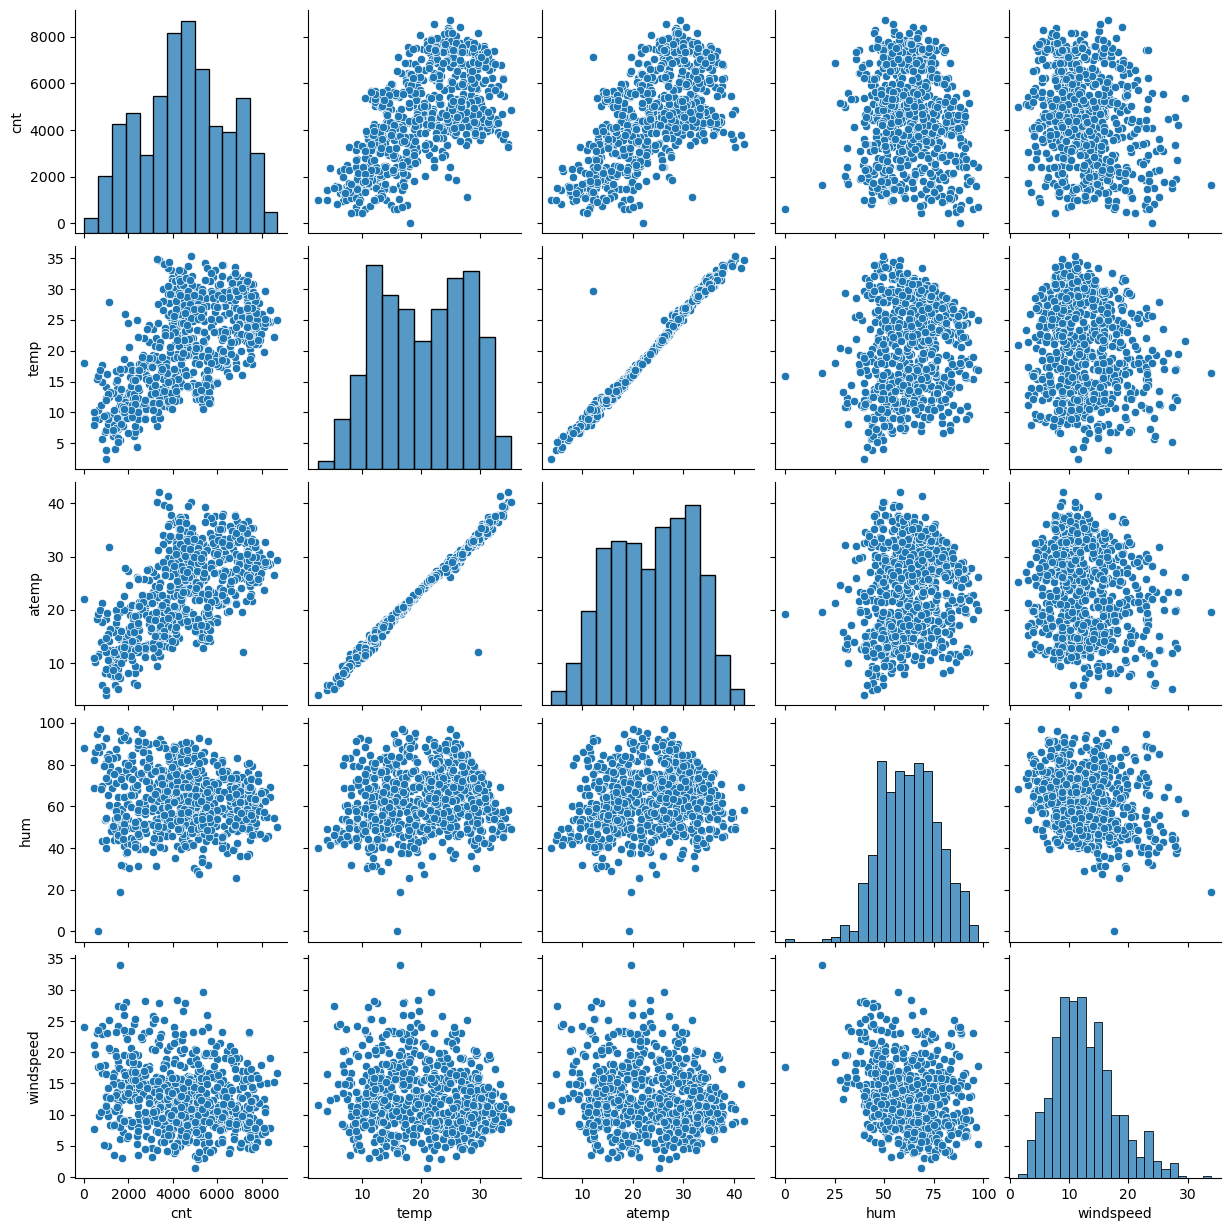

In [19]:
plt.figure(figsize=(10,8))
numeric = df[['cnt', 'temp', 'atemp', 'hum','windspeed']]
sns.pairplot(numeric)
plt.show()

#### <font color = 'Blue'>Insights:</font> 
- 'cnt' the target variable is showing linear relationship with predictor variable 'temp' and 'atemp'

#### <font color = 'Red'>Visualing Categorical variables</font>

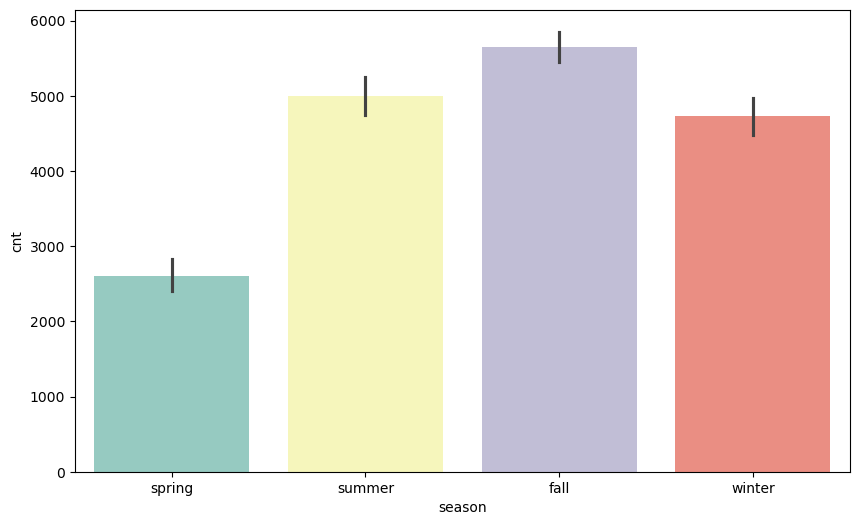

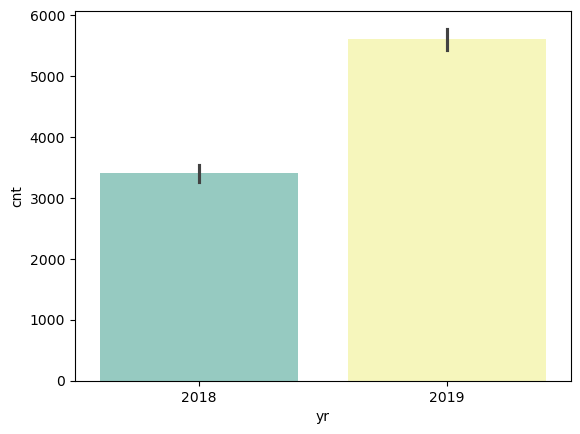

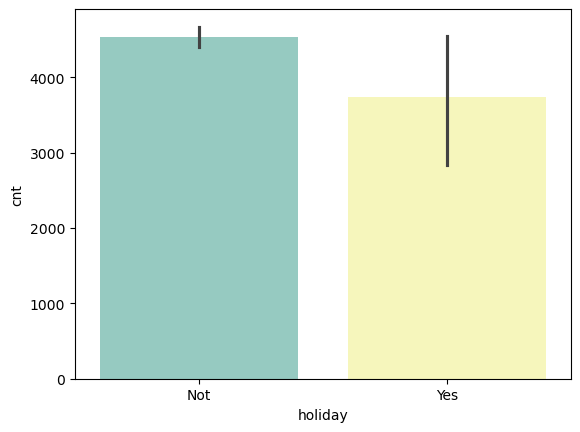

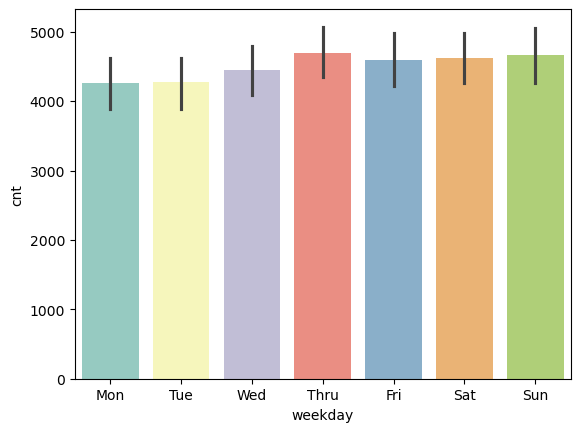

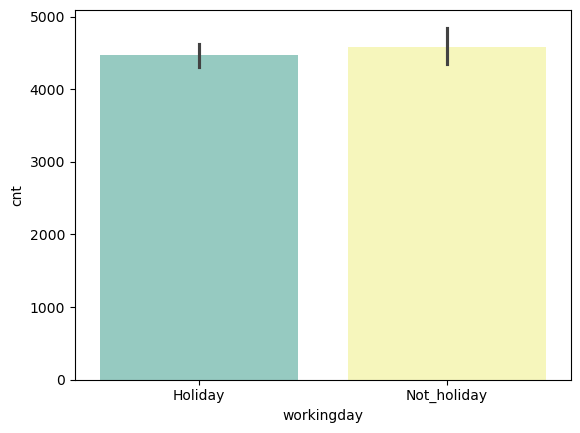

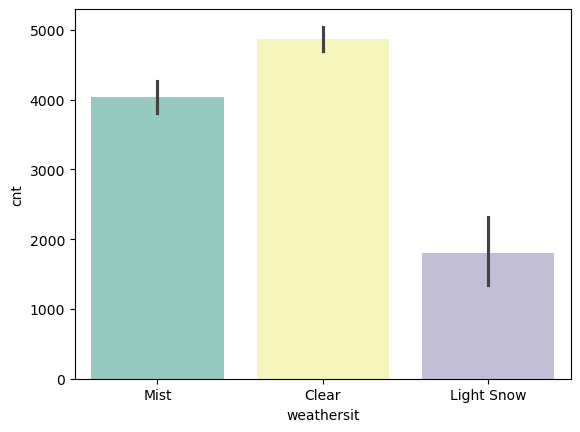

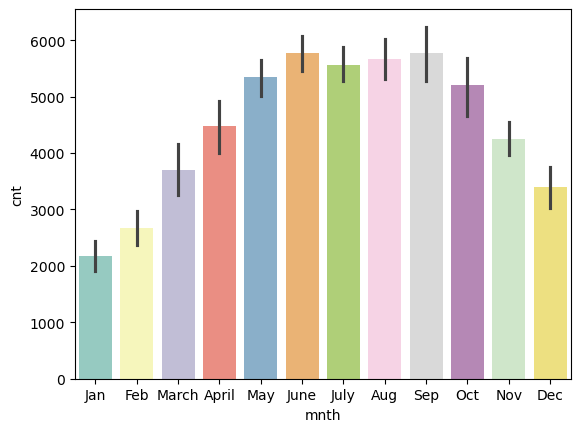

In [20]:
cat_var = ['season','yr','holiday','weekday','workingday','weathersit','mnth']
j=1
plt.figure(figsize=(10,6))
for i in cat_var:
  sns.barplot(x=i, y='cnt', data=df,palette = 'Set3',legend=False)
  plt.show()

#### <font color = 'Blue'>Insights:</font> 
- During the spring season, people avoid bike riding, while fall and summer are preferred.
- Demand increased in 2019 compared to 2018.
- The demand is slightly lower on holidays than on non-holidays.
- Demand decreases during light snow, but it is very high when the weather is clear.
- Maximum sale is in the month of May,june,july,Aug, and sep.

<Axes: xlabel='weathersit', ylabel='cnt'>

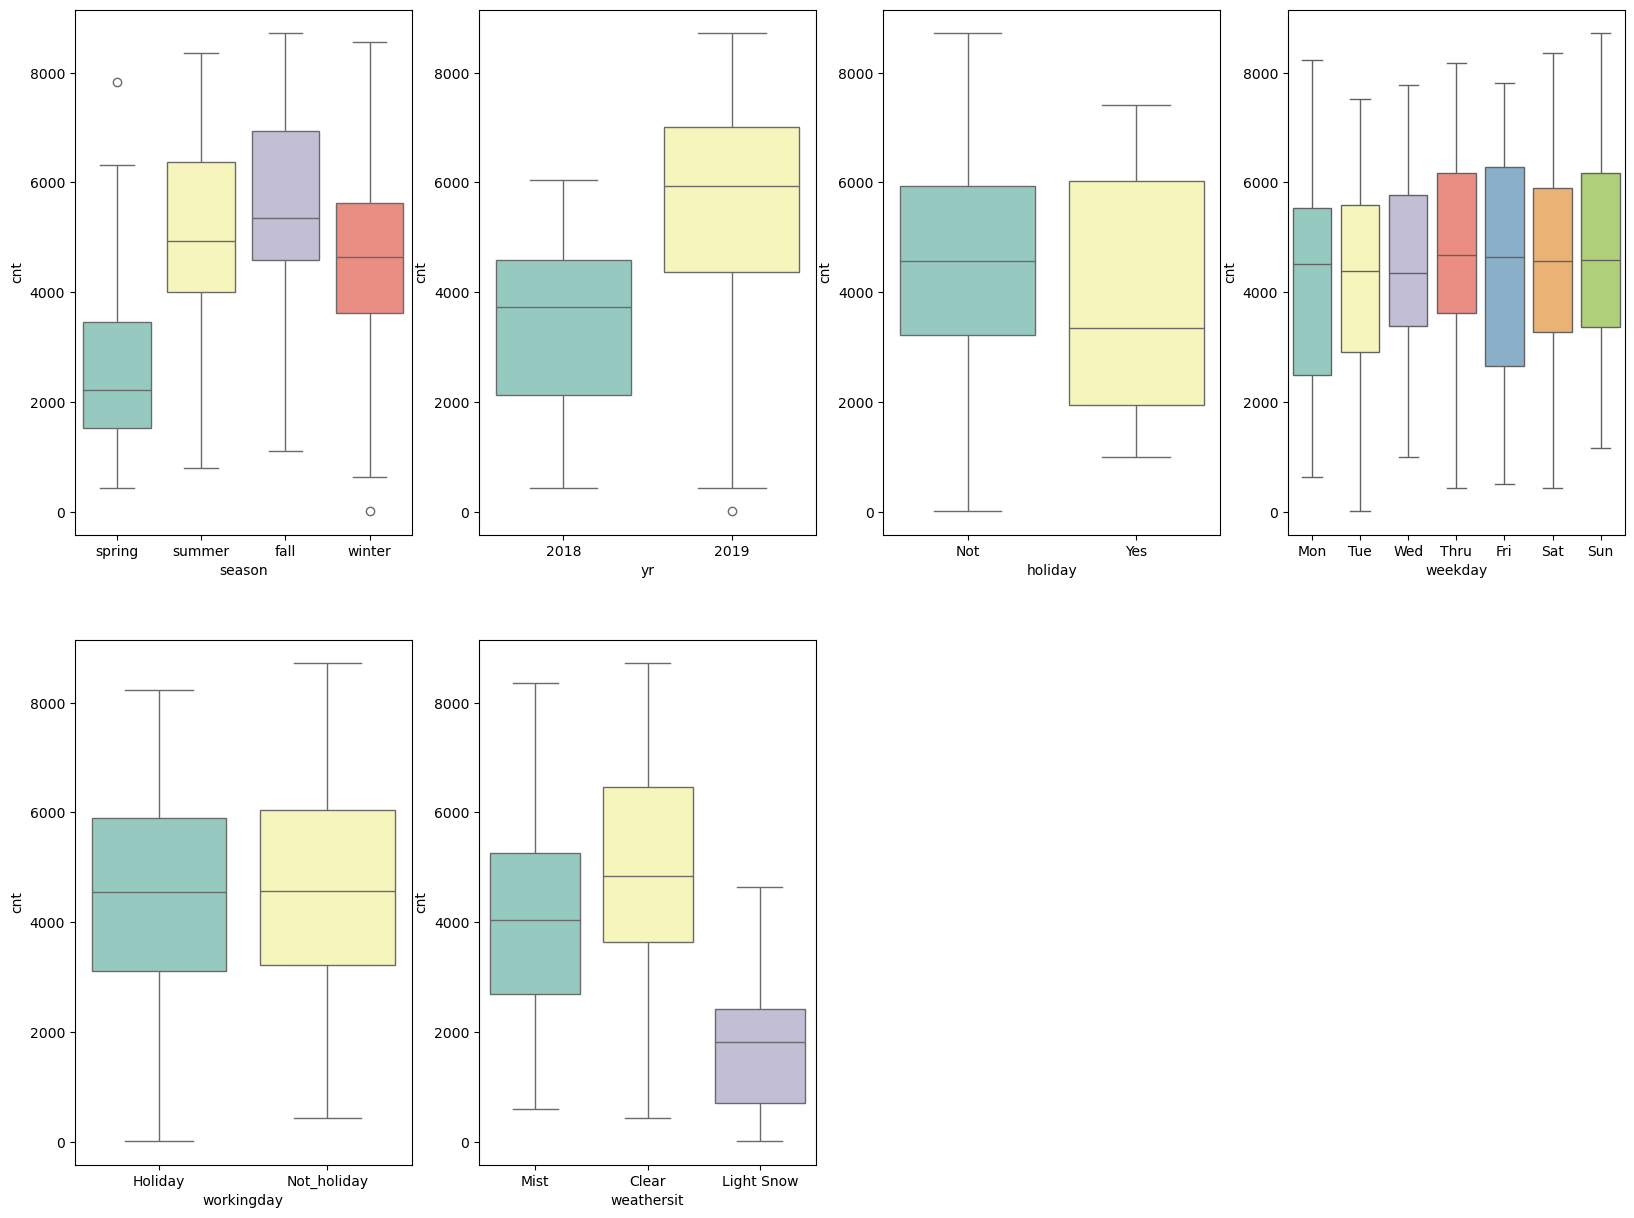

In [21]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df, palette = 'Set3',legend=False, hue='season')
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df, palette = 'Set3',legend=False, hue='yr')
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df, palette = 'Set3',legend=False, hue='holiday')
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df, palette = 'Set3',legend=False, hue='weekday')
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df, palette = 'Set3',legend=False, hue='workingday')
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df, palette = 'Set3',legend=False, hue='weathersit')

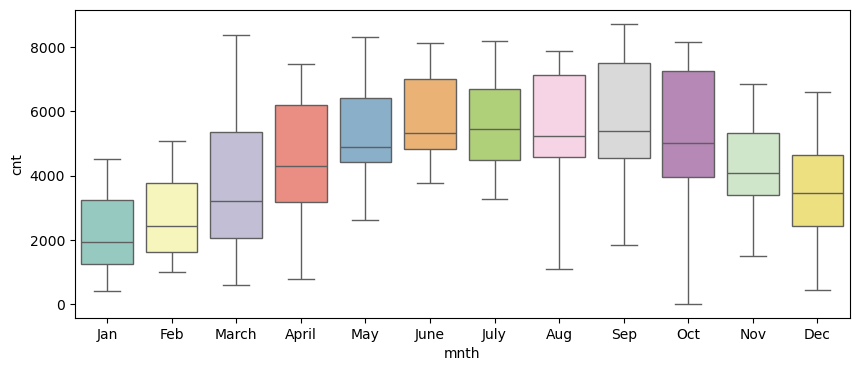

In [22]:
plt.figure(figsize=(10,4))
sns.boxplot(x = 'mnth', y = 'cnt', data = df, palette = 'Set3',legend=False, hue='mnth')
plt.show()

### <font color = 'Blue'> Insights: </font>
- The graph shows the distribution of the data , predictor variables clearly shows the relation with target variable cnt hence making the model becomes   more significant.
- We can see in the season 'summer' and 'fall' demand increases.
- This bike sharing demand increases as the popularity increases over the year, it is quite clear with gap in the average demand in the year 2018 and     2019.
- In holiday column when it is working day demand is more because people use it for going office.
- When weather is clear people prefer for bike sharing.
- Whether it is working day or not it is not affecting the count.And also count is constant throughout the week.

In [23]:
numeric = df.select_dtypes(include='number')
numeric.corr()

,yr,temp,atemp,hum,windspeed,casual,registered,cnt
yr,1.000000,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
temp,0.048789,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.047215,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,-0.112547,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.011624,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.250502,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.596911,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.569728,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


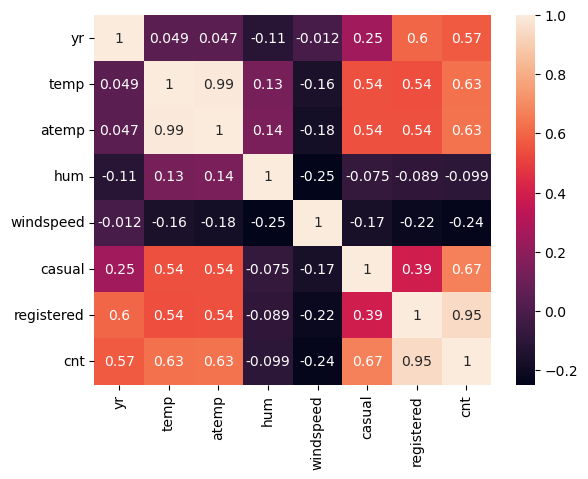

In [24]:
sns.heatmap( numeric.corr(), annot =True)
plt.show()

### <font color = 'Blue'> Insights: </font>
- The 'atemp' and 'temp are highly correlated with the 'cnt' that means people generally prefer summer season for bike sharing.
- The 'casual' and 'registered' are also highly correlated with the 'cnt' as the target variable is summation of both the columns.
- The 'hum' and 'windspeed' are negatively correlated with 'cnt' that means when weather is windy or humid people generally avoid bike riding.

The column 'atemp' and 'temp' are correlated 0.99 approximately equal 1 , reason dropping the 'atemp' column

In [25]:
df.drop(columns=['atemp','registered','casual'],inplace =True)
df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,Not,Mon,Holiday,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,Not,Tue,Holiday,Mist,14.902598,69.6087,16.652113,801


## Step 3: Data Prepration

## Dummy variables

columns like 'season','yr','mnth','holiday','weekday','workingday' and 'weathersit' are categorical variable with different labels need to convert in numeric using dummy variables.

In [26]:
df = pd.get_dummies(df,
                                columns=[
                                    'season', 'yr', 'mnth', 'holiday',
                                    'weekday', 'workingday', 'weathersit'
                                ],
                                drop_first=True,
                                dtype="int")
df.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thru,weekday_Tue,weekday_Wed,workingday_Not_holiday,weathersit_Light Snow,weathersit_Mist
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'holiday_Yes', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thru', 'weekday_Tue',
       'weekday_Wed', 'workingday_Not_holiday', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [28]:
df.shape

(730, 29)

## Step4 :Splitting the data into training and testing Tests

In [29]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
df_train.shape

(510, 29)

In [31]:
df_test.shape

(219, 29)

## Rescaling the features

- Rescaling is important because target variable 'cnt' value is very large as compared to the columns like atemp, windspeed and hum due which very of coefficient can be very large.
- Using MinMax Scaler for rescaling so that the values of the numeric column can be between 0 and 1.

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variable
scal_var = ['cnt','hum','windspeed','temp']
df_train[scal_var] = scaler.fit_transform(df_train[scal_var])
df_train.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thru,weekday_Tue,weekday_Wed,workingday_Not_holiday,weathersit_Light Snow,weathersit_Mist
653,0.509887,0.575354,0.300794,0.864243,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
576,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
426,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
728,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
482,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1


## Checking correlation among the variable to see which variable are highly correlated with each other.

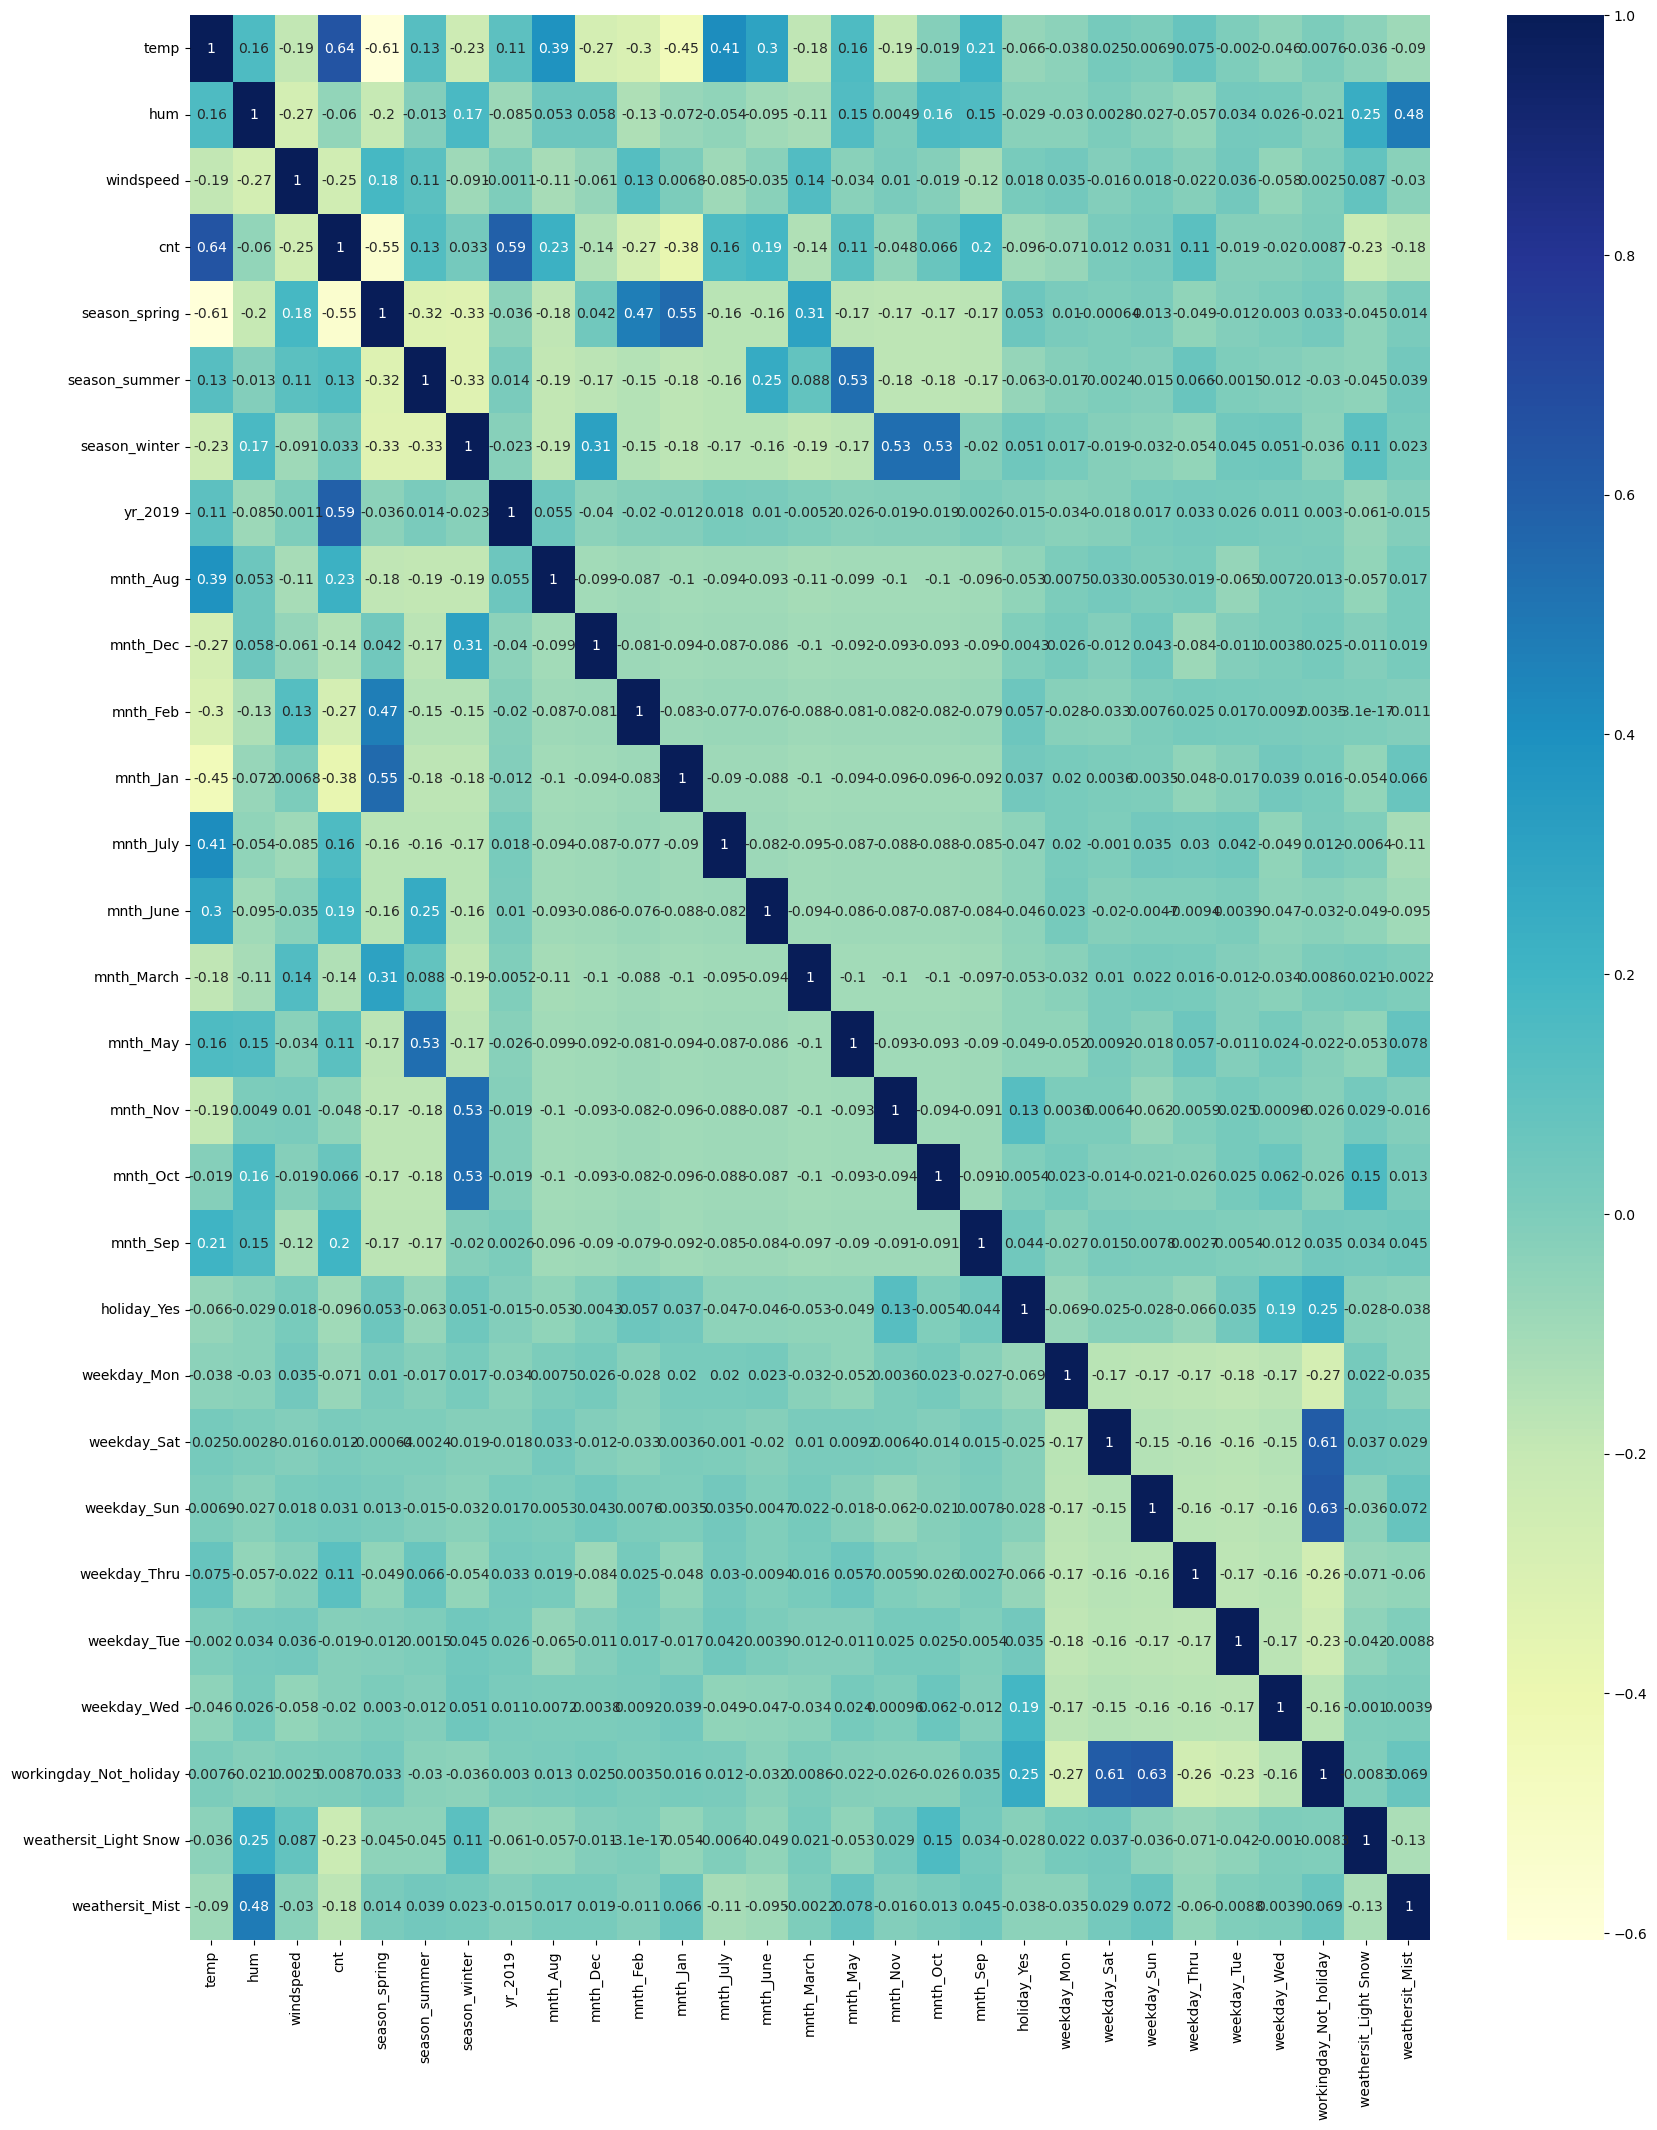

In [34]:
plt.figure(figsize = (20, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### <font color = 'Blue'> Insights: </font>
- Target variable is positively correlated with 'temp' and 'season_winter
- Target variable is negatively correlated with 'windspeed'.

## Dividing into X and Y set for model building

In [35]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 6:Buidling a linear model

Approach used in building a model is a mix approach
- First using RFE method for feature selection after that manually checking the predictor variables using statsmodel

## Feature selection using RFE

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select =15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_March', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thru', False, 12),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 10),
 ('workingday_Not_holiday', False, 3),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [39]:
## Columns select through Rfe model

In [40]:
column =X_train.columns[rfe.support_]
column

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Jan', 'mnth_July',
       'mnth_Nov', 'mnth_Sep', 'holiday_Yes', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [41]:
column_not =X_train.columns[~rfe.support_]
column_not

Index(['mnth_Aug', 'mnth_Feb', 'mnth_June', 'mnth_March', 'mnth_May',
       'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thru',
       'weekday_Tue', 'weekday_Wed', 'workingday_Not_holiday'],
      dtype='object')

## Building model using Statsmodel by manually checking the predictor variable

In [42]:
X_train_rfe=X_train[column]

## Adding a constant
Adding constant otherwise statsmodel will pass the fit line through the origin 

In [43]:
import statsmodels.api as sm
X_train_rfe_lm= sm.add_constant(X_train_rfe)
X_train_rfe_lm.head()

,const,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep,holiday_Yes,weathersit_Light Snow,weathersit_Mist
653,1.0,0.509887,0.575354,0.300794,0,0,1,1,0,0,0,0,0,0,0,0
576,1.0,0.815169,0.725633,0.264686,0,0,0,1,0,0,1,0,0,0,0,0
426,1.0,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,0,1
728,1.0,0.245101,0.498067,0.663106,1,0,0,1,1,0,0,0,0,0,0,0
482,1.0,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,0,1


In [44]:
lm = sm.OLS(y_train,X_train_rfe_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          3.34e-189
Time:                        16:19:14   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3202      0.036      8.886      0.000       0.249       0.391
temp                      0.4800      0.037     12.977      0.000       0.407       0.553
hum                      -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring            -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer             0.0408      0.015      2.659      0.008       0.011       0.071
season_winter             0.1034      0.018      5.763      0.000       0.068       0.139
yr_2019                   0.2303      0.008     28.511      0.000       0.214       0.246
mnth_Dec                 -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_Jan                 -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_July                -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_Nov                 -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_Sep                  0.0749      0.017      4.438      0.000       0.042       0.108
holiday_Yes              -0.0912      0.026     -3.566      0.000      -0.141      -0.041
weathersit_Light Snow    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weathersit_Mist          -0.0559      0.010     -5.338      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color = 'Blue'> Insights: </font>
- p value of the predictor variable are less than 0.05 which is good.

## checking Multicollinearity of the variables

In [45]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,30.94
0,temp,17.80
2,windspeed,4.72
3,season_spring,4.37
5,season_winter,4.06
4,season_summer,2.81
14,weathersit_Mist,2.32
6,yr_2019,2.09
10,mnth_Nov,1.83
8,mnth_Jan,1.75


Ideal vif is less than 5 vif of 'hum' is 30.94 which is very high 

In [46]:
X_train_rfe.drop(columns ='hum',inplace=True)

## Model 2

In [47]:
X_train_rfe_lm= sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.57e-186
Time:                        16:19:15   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2466      0.032      7.679      0.000       0.184       0.310
temp                      0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_spring            -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer             0.0333      0.015      2.148      0.032       0.003       0.064
season_winter             0.0887      0.018      4.951      0.000       0.053       0.124
yr_2019                   0.2343      0.008     28.709      0.000       0.218       0.250
mnth_Dec                 -0.0445      0.018     -2.520      0.012      -0.079      -0.010
mnth_Jan                 -0.0503      0.018     -2.738      0.006      -0.086      -0.014
mnth_July                -0.0504      0.018     -2.725      0.007      -0.087      -0.014
mnth_Nov                 -0.0419      0.019     -2.198      0.028      -0.079      -0.004
mnth_Sep                  0.0682      0.017      3.992      0.000       0.035       0.102
holiday_Yes              -0.0919      0.026     -3.533      0.000      -0.143      -0.041
weathersit_Light Snow    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
weathersit_Mist          -0.0814      0.009     -9.359      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.17
1,windspeed,4.67
4,season_winter,2.94
2,season_spring,2.89
3,season_summer,2.23
5,yr_2019,2.07
9,mnth_Nov,1.80
7,mnth_Jan,1.66
8,mnth_July,1.59
13,weathersit_Mist,1.56


### <font color = 'Blue'> Insights: </font>
- p-value as well as vif both the value are in range 

## Step7: Residual Analysis of the train data

In [49]:
y_train_pred = lm.predict(X_train_rfe_lm)

Text(0.5, 0, 'Errors')

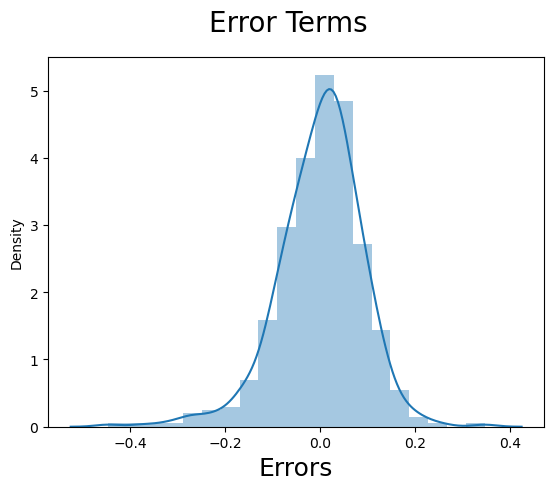

In [50]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

#### <font color = 'Blue'> Inference: </font>
- Mean of the error is zero that mean model is following the assumption

## Step 8 : Making predictions using final model

## Applying scaling on test set 

In [51]:
scal_var = ['cnt','hum','windspeed','temp']
df_test[scal_var] = scaler.transform(df_test[scal_var])
df_test.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thru,weekday_Tue,weekday_Wed,workingday_Not_holiday,weathersit_Light Snow,weathersit_Mist
184,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
535,0.901354,0.610133,0.153728,0.712034,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
221,0.881625,0.437098,0.339570,0.547400,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


## Dividing into X and Y set for model prediction

In [52]:
y_test = df_test.pop('cnt')
X_test = df_test

In [53]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
#X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test = sm.add_constant(X_test[X_train_rfe.columns])

In [54]:
X_test.columns

Index(['const', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Jan', 'mnth_July',
       'mnth_Nov', 'mnth_Sep', 'holiday_Yes', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [55]:
# Making predict
y_test_pred = lm.predict(X_test)

## Calculating the R Squared

In [56]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.8398671054755011
r2_score of test dataset 0.8132736736429256


#### <font color = 'Blue'> Insights: </font>
- r2_score for train set is 0.83 and test set r2_score is 0.813 which is quite close to each other means training set is able to apply learning over the test set.

## Step 9: Model Evaluation

Text(0, 0.5, 'y_test_pred')

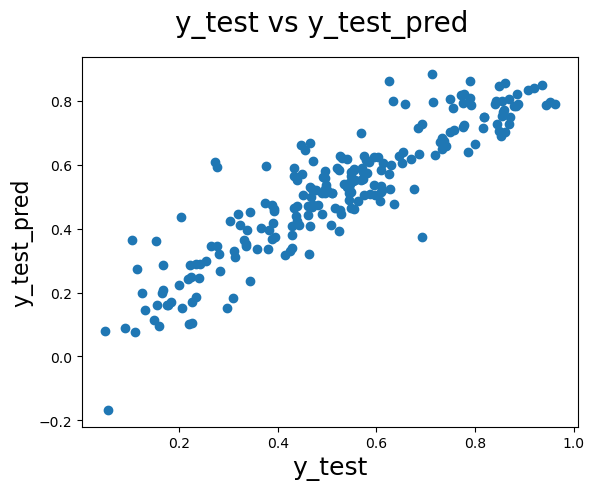

In [57]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)    

In [58]:
round(lm.params,4)

const                    0.2466
temp                     0.4377
windspeed               -0.1586
season_spring           -0.0716
season_summer            0.0333
season_winter            0.0887
yr_2019                  0.2343
mnth_Dec                -0.0445
mnth_Jan                -0.0503
mnth_July               -0.0504
mnth_Nov                -0.0419
mnth_Sep                 0.0682
holiday_Yes             -0.0919
weathersit_Light Snow   -0.2929
weathersit_Mist         -0.0814
dtype: float64

#### <font color = 'Blue'> Equation of the best fitted line: </font>
cnt = 0.2466 + 0.4377*temp -0.1586*windspeed-0.0716*season_spring+0.0333*season_summer+0.0887*season_winter+0.2343*yr_2019-0.0445*mnth_Dec-0.0503*mnth_Jan-0.0504*mnth_July-0.0419*mnth_Nov+0.0682*mnth_sep-0.0919*holiday_Yes-0.2929*weathersit_Light Snow-0.0814*weathersit_Mist

#### <font color = 'Red'> Conclusion: </font>
- Demand for bike sharing has the positive relation with temp ,season_summer,season_winter,yr_2019 and mnth_sep
- Demand has negative relation with windspeed , season_spring, holiday_Yes, weathersit_light_Snow ,weathersit_mist
- Demand increase when temp is normal in weather like light_snow or mist demand dcreases
- In high windspeed people avoid bike riding
- Bike cnt is less during holidays.

#### <font color = 'Red'> Recommendation for the company: </font>

- The months - may , June , july , Aug and sep should be considered by the company as they have a higher demand as compared to other months.
- With an increase in temperature the demand also increases, hence it is important to keep track of weather condition.
- During the fall season the demand rises, hence it should be well prepared to meet the high demand.
- Holiday time seems to be least interesting for biking, some sort of interesting offer should be kept to keep them attracted.